# Time Series

## Time Series vs. Regular Regression 
* It is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.

* Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

## Stationarity and ACF
For an ACF to make sense, the series must be a weakly stationary series.  This means that the autocorrelation for any particular lag is the same regardless of where we are in time.


__Definition__: A series $x_t$ is said to be (weakly) stationary if it satisfies the following properties:

* The mean $E(x_t)$ is the same for all t.
* The variance of $x_t$ is the same for all t.
* The covariance (and also correlation) between $x_t$ and $x_{t-h}$ is the same for all t.

__Definition__: Let $x_t$ denote the value of a time series at time t.  The __ACF__ of the series gives correlations between $x_t$ and $x_{t-h}$ for h = 1, 2, 3, etc. Theoretically, the autocorrelation between $x_t$ and $x_{t-h}$ equals
$$\frac{Covariance(x_t, x_{t-h})}{sd(x_t)sd(x_{t-h})}=\frac{Covariance(x_t, x_{t-h})}{Variance(x_t)}$$

The last property of a weakly stationary series says that the theoretical value of an autocorrelation of particular lag is the same across the whole series.  An interesting property of a stationary series is that theoretically it has the same structure forwards as it does backwards.

Many stationary series have recognizable ACF patterns.  Most series that we encounter in practice, however, are not stationary.  A continual upward trend, for example, is a violation of the requirement that the mean is the same for all t.  Distinct seasonal patterns also violate that requirement. 

## The AR model: autoregressive model
Theoretically, the AR(1) model is written (autoregressive model of order 1)
$$x_t=\delta+\phi_{1}x_{t-1}+w_t$$
Assumptions:

* $w_t \overset{iid}{\sim}N(0, \sigma_w^2)$,  meaning that the errors are independently distributed with a normal distribution that has mean 0 and constant variance.
* Properties of the errors $w_t$ are independent of $x_t$.
* The series $x_1, x_2, ...$ is (weakly) stationary.  A requirement for a stationary AR(1) is that $|\phi_1|$<1.  

Properties of the AR(1):

Formulas for the mean, variance, and ACF for a time series process with an AR(1) model follow.

The (theoretical) mean of $x_t$ is
$$\mu=\frac{\delta}{1−\phi_1}$$
The variance of $x_t$ is
$$Var(x_t)=\frac{\sigma^2_w}{1−\phi^2_1}$$
The correlation between observations h time periods apart is
$$\rho_h=\phi^h_1$$


## The MA model: simple moving average model
A moving average term in a time series model is a past error (multiplied by a coefficient).

Let $w_t \overset{iid}{\sim}N(0, \sigma_w^2)$, meaning that the $w_t$ are identically, independently distributed, each with a normal distribution having mean 0 and the same variance. 

The 1st order moving average model, denoted by __MA(1)__ is
$$x_t=\mu+w_t+\theta_1w_{t-1}$$

Theoretical Properties of a Time Series with an MA(1) Model
* Mean is $E(x_t)=\mu$
* Variance is $Var(x_t)=\sigma_w^2(1+\theta_1^2)$
* Autocorrelation function(ACF) is 
$$\rho_1=\frac{\theta_1}{1+\theta_1^2},\;and\;\rho_h=0\;for\;h\geq2$$

The 2nd order moving average model, denoted by __MA(2)__ is
$$x_t=\mu+w_t+\theta_1w_{t-1}+\theta_2w_{t-2}$$

Theoretical Properties of a Time Series with an MA(2) Model
* Mean is $E(x_t)=\mu$
* Variance is $Var(x_t)=\sigma_w^2(1+\theta_1^2+\theta_2^2)$
* Autocorrelation function(ACF) is 
$$\rho_1=\frac{\theta_1+\theta_1\theta_2}{1+\theta_1^2+\theta_2^2},\;\rho_2=\frac{\theta_2}{1+\theta_1^2+\theta_2^2},\;and\;\rho_h=0\;for\;h\geq3$$

Note that the only nonzero values in the theoretical ACF are for lags 1 and 2.  Autocorrelations for higher lags are 0.  So, a sample ACF with significant autocorrelations at lags 1 and 2, but non-significant autocorrelations for higher lags indicates a possible MA(2) model.

The qth order moving average model, denoted by MA(q) is
$$x_t=\mu+w_t+\theta_1w_{t-1}+\theta_2w_{t-2}+...+\theta_qw_{t-q}$$

## Partial Autocorrelation Function (PACF)
In general, a partial correlation is a conditional correlation. In regression, this partial correlation could be found by correlating the residuals from two different regressions:  (1) Regression in which we predict y from x1 and x2, (2) regression in which we predict x3 from x1 and x2.  Basically, we correlate the “parts” of y and x3 that are not predicted by x1 and x2. More formally, we can define the partial correlation just described as
$$\frac{Covariance(y, x_3|x_1, x_2)}{\sqrt{Variance(y|x_1, x_2)Variance(x_3|x_1, x_2)}}$$

For a time series, the partial autocorrelation between $x_t$ and $x_{t-h}$ is defined as the conditional correlation between $x_t$ and $x_{t-h}$, conditional on $x_{t-h+1}, ... , $x_{t-1}$, the set of observations that come between the time points t and t−h.

* The 1st order partial autocorrelation will be defined to equal the 1st order autocorrelation.
* The 2nd order (lag) partial autocorrelation is
$$\frac{Covariance(x_t, x_{t-2}|x_{t-1})}{\sqrt{Variance(x_t|x_{t-1})Variance(x_{t-2}|x_{t-1})}}$$

And, so on, for any lag.

## The ARIMA model (Autoregressive Integrated Moving Average)

ARIMA models, also called Box-Jenkins models, are models that may possibly include autoregressive terms, moving average terms, and differencing operations.  Various abbreviations are used:

* When a model only involves autoregressive terms it may be referred to as an AR model.  When a model only involves moving average terms, it may be referred to as an MA model.
* When no differencing is involved, the abbreviation ARMA may be used.

__ARIMA(p,d,q) forecasting equation__: ARIMA models are, in theory, the most general class of models for forecasting a time series which can be made to be “stationary” by differencing (if necessary), perhaps in conjunction with nonlinear transformations such as logging or deflating (if necessary). An ARIMA model can be viewed as a “filter” that tries to separate the signal from the noise, and the signal is then extrapolated into the future to obtain forecasts.

Technically there is difference between ARMA and ARIMA i.e. to make the data stationary in ARIMA model. Apart from that both follow same methodology.

A nonseasonal ARIMA model is classified as an __"ARIMA(p,d,q)"__ model, where:

* __p__ is the number of autoregressive terms,
* __d__ is the number of nonseasonal differences needed for stationarity, and
* __q__ is the number of lagged forecast errors in the prediction equation.

For ARIMA (1,1,1), a model with one AR term and one MA term is being applied to the variable $z_t=x_t-x_{t-1}$.  A first difference might be used to account for a linear trend in the data.

The differencing order refers to successive first differences.  For example, for a difference order = 2 the variable analyzed is $z_t = (x_t-x_{t-1}) - (x_{t-1}-x_{t-2})$, the first difference of first differences.  This type of difference might account for a quadratic trend in the data.

## How to Identify a Possible Model
Three items should be considered to determine a first guess at an ARIMA model: a time series plot of the data, the ACF, and the PACF.

__Time series plot of the observed series__
* If there’s an obvious upward or downward linear trend, a first difference may be needed.  A quadratic trend might need a 2nd order difference. Over-differencing can cause us to introduce unnecessary levels of dependency.
* For data with a curved upward trend accompanied by increasing variance, you should consider transforming the series with either a logarithm or a square root.
* Nonconstant variance in a series with no trend may have to be addressed with something like an ARCH model which includes a model for changing variation over time. 

__ACF and PACF__
* AR models have theoretical PACFs with non-zero values at the AR terms in the model and zero values elsewhere.  The ACF will taper to zero in some fashion. An AR(1) model has an ACF with a pattern $\rho_k=\rho_1^k$, the following is an example:


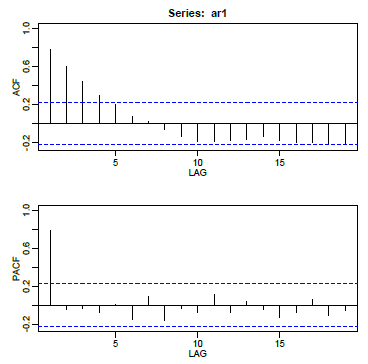

In [1]:
from IPython.display import Image
Image(filename='ar1_example.png')

* An AR(2) has a sinusoidal ACF that converges to 0, the following is an example:

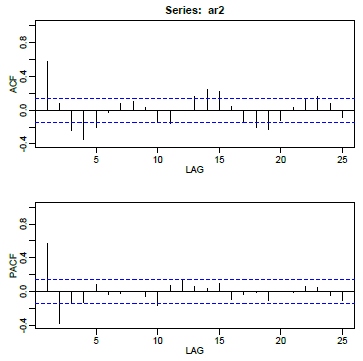

In [2]:
from IPython.display import Image
Image(filename='ar2_example.png')

* MA models have theoretical ACFs with non-zero values at the MA terms in the model and zero values elsewhere. The following is an example of MA(1) model:

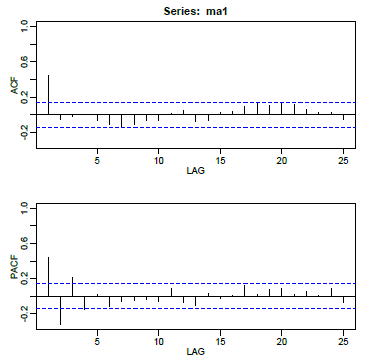

In [3]:
from IPython.display import Image
Image(filename='ma1_example.png')

* ARMA models (including both AR and MA terms) have ACFs and PACFs that both tail off to 0.  These are the trickiest because the order will not be particularly obvious.  Basically you just have to guess that one or two terms of each type may be needed and then see what happens when you estimate the model.  The following is an example of ARMA(1) model:

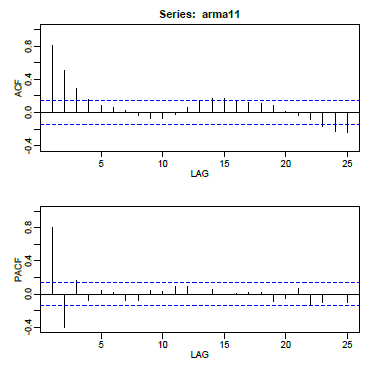

In [5]:
from IPython.display import Image
Image(filename='arma11_example.png')

* If the ACF and PACF do not tail off, but instead have values that stay close to 1 over many lags, the series is non-stationary and differencing will be needed.  Try a first difference and then look at the ACF and PACF of the differenced data.
* If all autocorrelations are non-significant, then the series is random (white noise; the ordering matters, but the data are independent and identically distributed.)  You’re done at that point.
* If you have taken first differences and all autocorrelations are non-significant, then the series is called a random walk and you are done.  (A possible model for a random walk is $x_t = \delta + x_{t-1} + w_t$.  The data are dependent and are not identically distributed; in fact both the mean and variance are increasing through time.)

__Estimating and Diagnosing a Possible Model__
* Look at the significance of the coefficients. 
* Look at the ACF of the residuals.  For a good model, all autocorrelations for the residual series should be non-significant. 
* Look at Box-Pierce (Ljung) tests for possible residual autocorrelation at various lags 
* If non-constant variance is a concern, look at a plot of residuals versus fits and/or a time series plot of the residuals.

## Sample Code

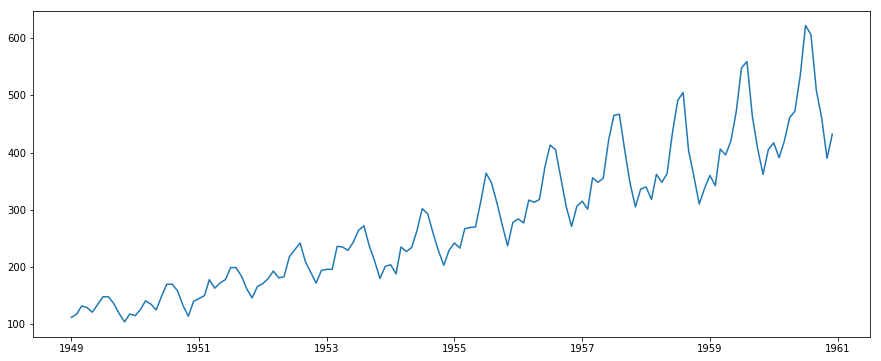

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


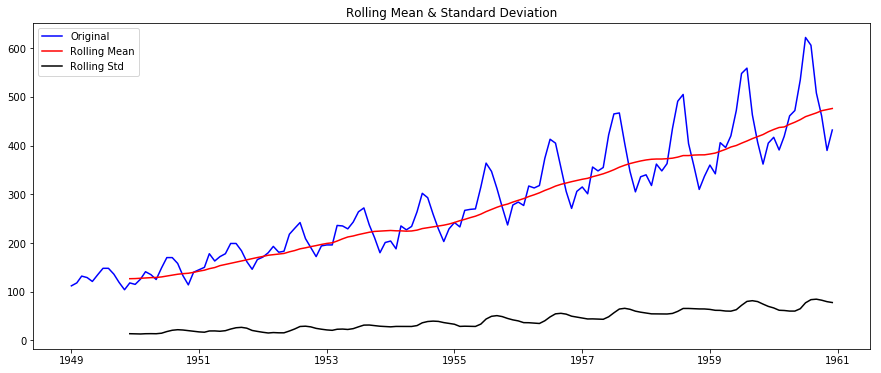

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


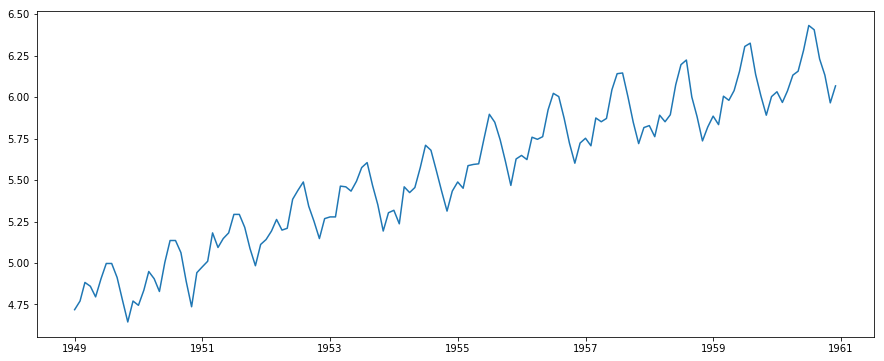

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()


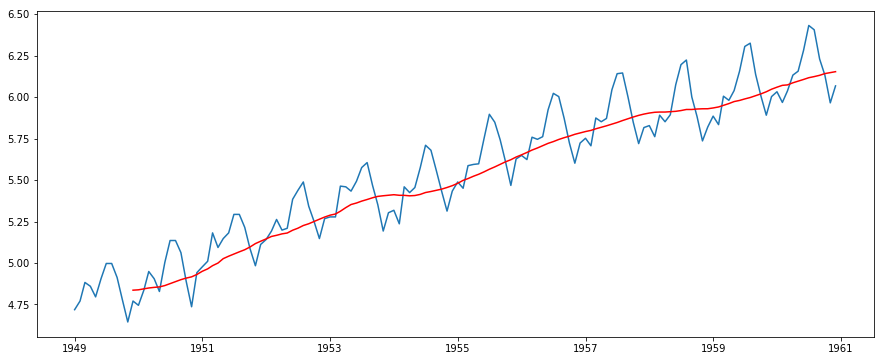

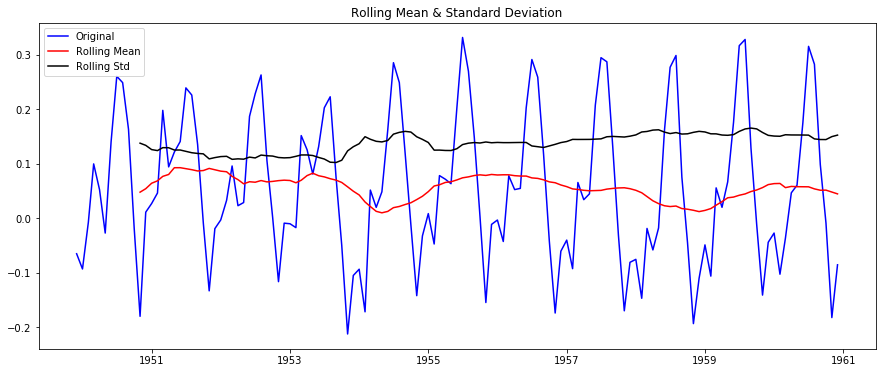

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()


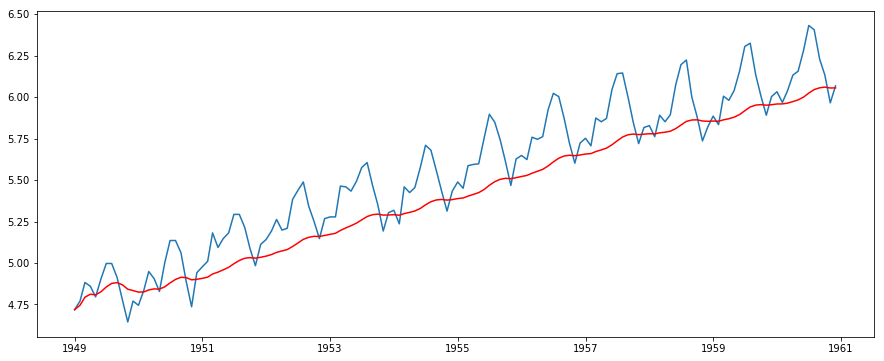

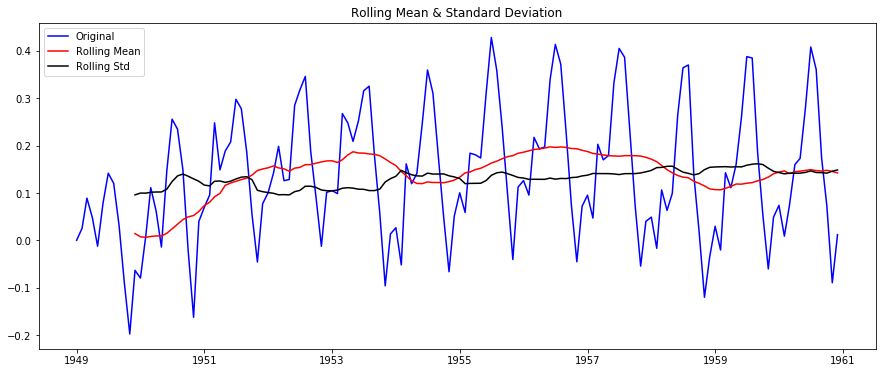

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


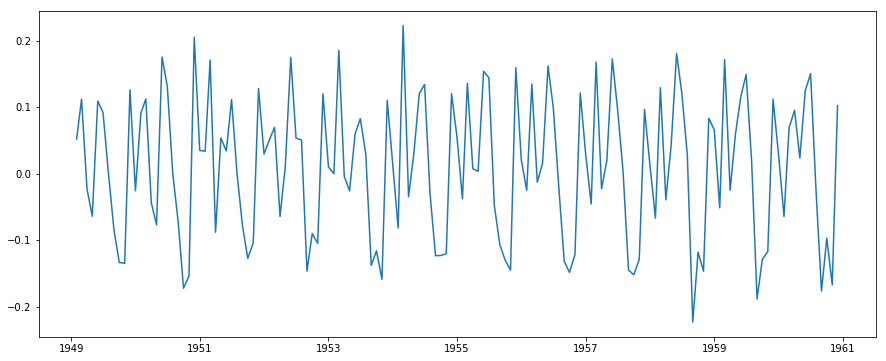

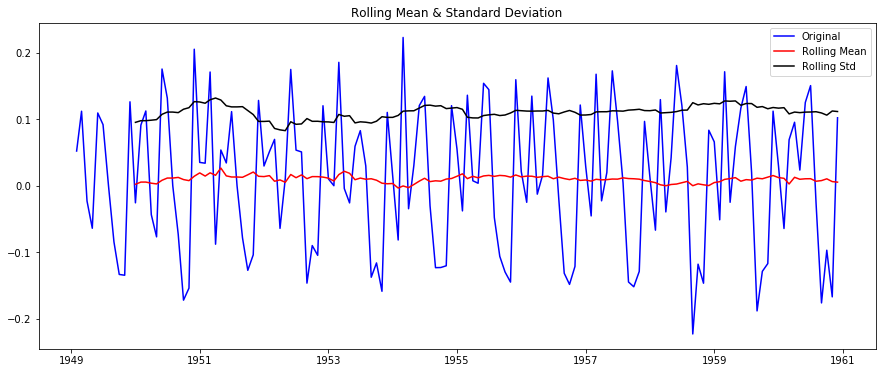

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


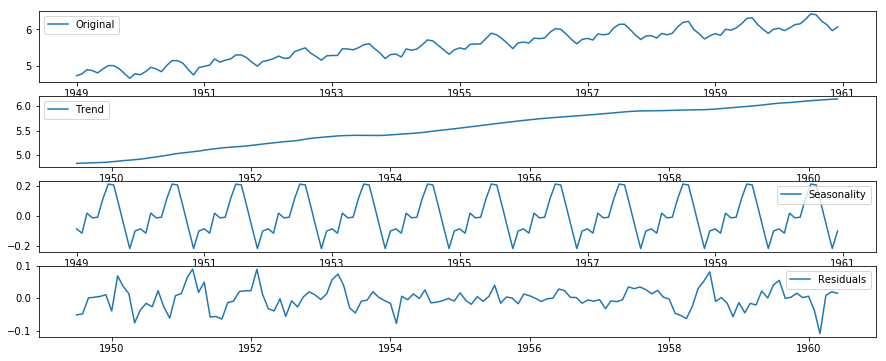

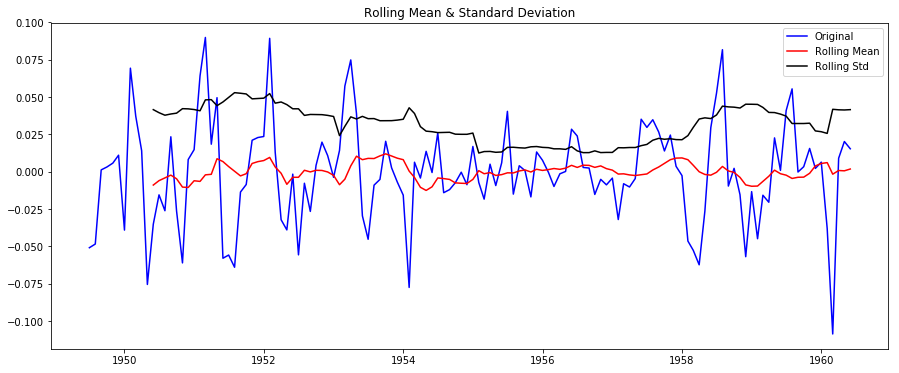

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


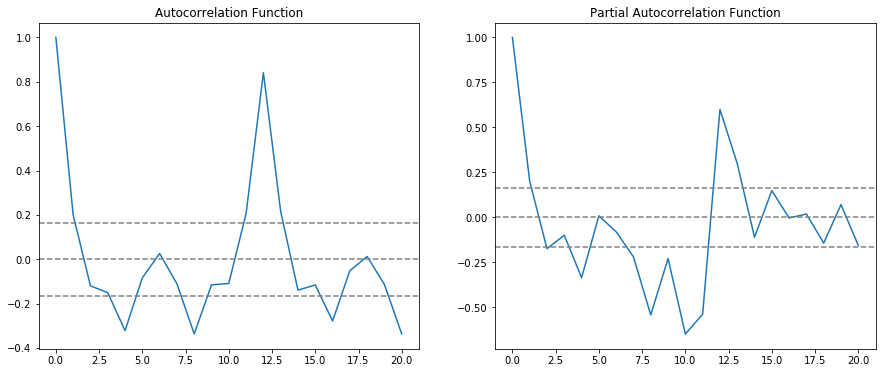

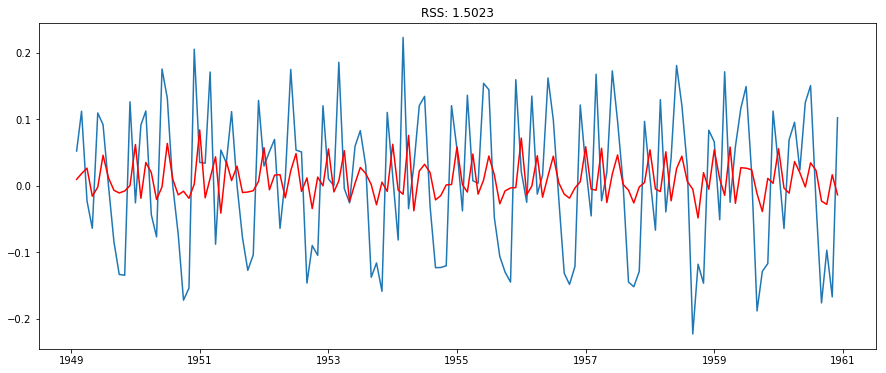

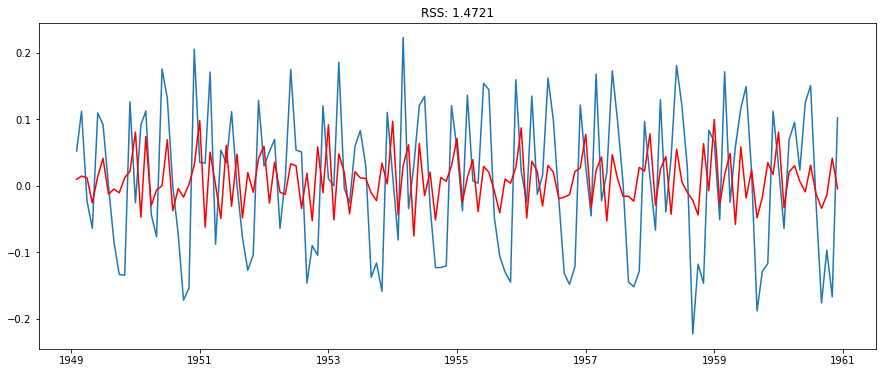

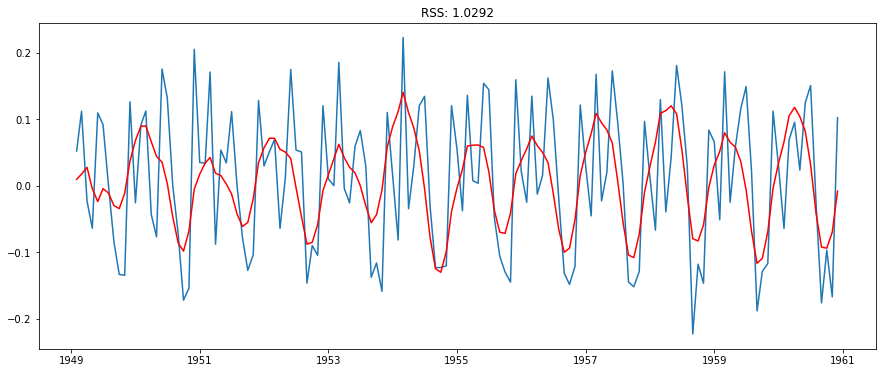

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64
Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


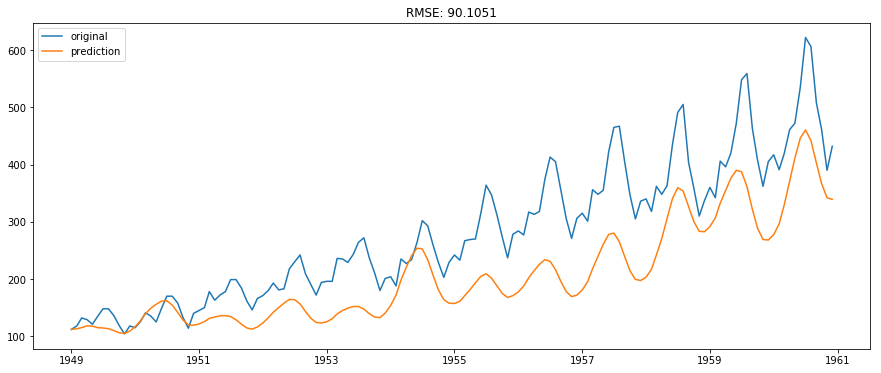

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 11 11:40:02 2017

@author: xuefei.yang
"""

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

data = pd.read_csv('AirPassengers.csv')
data.head()
data.dtypes

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)
data.head()
data.index


"""
parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.
index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. 
           So this argument tells pandas to use the ‘Month’ column as index.
date_parser: This specifies a function which converts an input string into datetime variable. 
             By default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, 
             the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.
"""


# =============================================================================
# Indexing techniques
# =============================================================================
ts = data['#Passengers'] 
ts.head(10)

# Select a particular value in the Series object
# 1. Specific the index as a string constant:
ts['1949-01-01']

# 2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

# All the data upto May 1949
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

#2. Use ':' if one of the indices is at ends: (Unlike numeric indexing, the end index is included here)
ts[:'1949-05-01']


# All the values of the year 1949
ts['1949']


# =============================================================================
# Check Staionarity
# =============================================================================
plt.plot(ts)
plt.show()

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)


# =============================================================================
# Estimating & Eliminating Trend
# =============================================================================
# transformation
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

# remove noise
# Aggregation – taking average for a time period like monthly/weekly averages
# Smoothing – taking rolling averages
# Polynomial Fitting – fit a regression model


# Moving Average
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()


ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

# exponentially weighted moving average
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.show()

ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Differencing – taking the differece with a particular time lag
# Decomposition – modeling both trend and seasonality and removing them from the model.
# differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)


# decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()


# stationarity of residuals
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)



# =============================================================================
# Forecasting a Time Series
# =============================================================================
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()



from statsmodels.tsa.arima_model import ARIMA

# AR Model
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.show()


# MA Model
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plt.show()



# Combined Model
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()


# =============================================================================
# Taking it back to origianl scale
# =============================================================================
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())


predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())


predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts, label='original')
plt.plot(predictions_ARIMA, label='prediction')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.show()


## Reference

Overall Tutorial: https://onlinecourses.science.psu.edu/stat510/node/64

MA model: https://onlinecourses.science.psu.edu/stat510/node/48

ARIMA terms: https://people.duke.edu/~rnau/411arim.htm

Sample Code: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/